# Feature Selection and Sparse Linear Selection

In [ ]:
# Imports
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## Data

In [ ]:
n = 50 
N = 50
M = 50

# The matrix X is a n * N matrix 

X = np.matrix([
     [13.2, -0.6, 10.9, 10.5, 12, 17.3, 18.7, 14.9, 16.9, 14.2, 15.8, 16.4, 6.3, 9.1, 17.2, 11.7, 10.2, 12.2, 8.7, 18, 11.8, 21.9, 23.7, 12.5, 14, 9.2, 20.3, 19.9, 13.3, 4.5, 22.8, 17, 13.4, 18.7, 17.6, 6.3, 12.4, 11, 12.6, 15.7, 21.7, 22.3, 18.2, 7.9, 21.3, 9.1, 4.7, 17.9, 18.5, 21.8],
     [24.1, 14.7, 11.6, 12.2, -6.4, 16.3, 10.6, 16.3, 9.1, 9.3, 11, 18.5, 9.9, 11.2, 11.6, 13.3, 5.8, 6.1, 13.6, 13.3, -2.8, 3.7, 5.6, 7.4, 7.5, -2.1, 3.1, -5.5, 11.3, 11.5, 4.8, 7.9, 10.3, 21.9, 27, 3, 9.6, 7.1, 7.1, -4.8, 10.2, 20.9, 10.9, 0.1, 22.2, 3.5, 5.1, 16.4, 13.5, 9.5], 
     [11.3, 5.4, -0.5, 15, 1.7, 6, -6.7, 4.9, 13.4, 0.3, 0.4, -6.5, 5.2, 12.5, 9, 9.9, 11.4, -2.1, 8.8, 2.3, 0.7, -4.3, 16.7, -1.7, 15, 8, 8.7, 4.6, 5.5, 19.3, 1.6, 1.8, 12.2, -5.6, -1.9, 9.4, 4, 19.9, 6.8, -10.2, 9.9, -4.6, 10.5, 4, 4.7, 4.5, 2.2, 4.8, -0.6, 21.3], 
     [8.7, 0.3, 18.7, 10.5, 16.8, 1.1, -6.9, 12.9, 10.4, -0.2, 9.1, 7.2, 11.1, -6.8, 14.6, 10.8, 14.7, 21, 17.5, 0.8, 7.4, 17.6, 3.6, 13, 16.5, 12.2, 12.7, 7.6, 18.9, 11.3, 4.3, 8.7, 2, 0.3, 6.4, 15.4, -7.6, 12.2, 9.7, 11.3, -0.2, 3.8, 12.5, 10.9, 3, 25.6, 7.7, 1, 5.3, 3], 
     [-17.4, -18.8, -8, -20.5, 3.2, -15, -10.1, -14.5, -6.3, -14.7, -21.2, -23.8, -15.7, -14.6, -27.6, -6.2, -15, -15.5, -7.6, -3.6, -13.7, -16, -8, -25.7, -4.8, -9.6, -18, -12.5, -11.1, -4.9, -0.4, -3.4, -10.4, -17.3, -3.4, -7.7, -1.5, -8.4, 4.8, -27.6, -13.8, -5.2, -11.7, -10.7, -9.4, -18.8, -15.5, -16.5, -13.9, -1.6],
     [7, 8.3, 9.3, -7, 2.8, 10.8, -11, -2.8, -8.1, -13.6, -11.4, 10.2, -10.7, -0.2, -1.8, -6.9, 8.4, -6.8, -17.9, -7.6, -12.2, -3.7, -11.6, -4.5, -5.6, 7.7, 10, 9.6, -10.6, 7, 0.4, 3.2, 7.5, 2.9, 4.5, -0.2, 11.4, -8.9, -16.1, 14, 9.5, -6.4, -15.2, -5.6, 3.7, 5.6, 2.6, 6.3, 3.5, 6.4],
     [-8.9, -15.8, -8.8, -9.4, -11, -13.8, -5.4, -2.8, -11, -12, -9.1, -6.2, -18.3, -9.2, -12.3, -14.9, -12.6, -7.9, -9.3, -12.6, -22.7, -17.4, -14, -7.7, -11, -22.9, -10.4, -9.1, -17.5, -16.8, -5.7, -12.9, -10.6, -2.9, -20.1, -18.7, -14, -20.2, -18.7, -10, -5, -25.3, -6.7, -12, -14.9, -8.2, -11.5, -12.8, -20.3, -15.9],
     [-18.8, -13.5, -10.7, -22.1, -24.4, -6.6, -18.8, -21, -8, -9.8, -16.2, -10.8, -12.1, -10.6, -5.3, -14.8, -12.2, -27.2, -6.5, -23.5, -10.3, -11.7, -21.5, -10.4, -19.6, -5.8, -16.9, -23.3, -10.3, -16.2, -25.3, -23.5, -4.8, -8.1, -9, -18.5, -13, -8.4, -5.7, -6.9, -20.5, -18.5, -18.1, -13.2, -21.4, -16.7, -24.2, -15.5, -23, -20],
     [21.3, 5.4, 3.1, 2, 5.8, 14.6, 5.9, -0, 6.4, 24.5, 2.6, 3.2, 18.1, -0.4, 9.4, 18.4, 13.6, 6.1, 32.9, 16.4, 9.3, 15.1, 22.1, 2.1, 30.5, 13.8, 9.8, 8.4, 11.9, 12.1, 10.9, 5.8, -2.5, 8.2, 13.4, 21, 14.8, 4.6, 15.5, 9.5, 9.5, -2.9, -9.9, 16, 20.5, 14.4, 7.8, 10.2, 3.4, 12.8],
     [3.8, 11.4, -7.5, 8.3, -19.2, -4.3, -0.4, -0.2, 4.7, -3.5, -1.9, -1.5, -5.3, -3.5, 2.5, 4.4, 12.1, 1.7, -0.1, -1.6, -4.2, -4.3, 4.8, -0.1, -8.8, -4.1, -9.1, 5.8, 4.2, -2.9, -3.2, -3.4, -1.4, 0.1, -4.1, -1.9, -1.1, -2.8, -1.5, -10.2, -0.9, -12.7, -0.1, -1.7, 0.9, 4.6, -11.4, -2.6, -7, 7.1],
     [18.2, 1.6, 15, 12.8, 9.2, 21.2, 23.8, 15.5, 24.7, 22.7, 20.2, 14.8, 17.1, 18.1, 14.6, 9.8, 11.7, 16.6, 20.8, 17.1, 15, 7.6, 12.5, 5.7, 27.3, 23.7, 7.4, 7.9, 14.9, 22.3, 15.8, -3.8, 13.7, 5.1, 7, 9.4, 1.4, 16, 19.7, 12.3, 11.6, 12.8, 26.9, 14.2, 6.6, 7.5, 15.2, 7.9, 0.8, 19.5],
     [11.2, 2.2, 2.6, 17.7, -1.4, -2.1, 24.5, 15.9, 15, 8, 9.2, 12.4, 3.3, 5.1, 4.8, 5.6, 13.7, 10.4, -0.8, 16.8, 14.5, 4.9, 13.5, 20.9, -4.8, 9.5, 1.3, 7.9, -1, 10.9, 18.8, 6.3, 9.6, 9.8, 11.7, 0.2, 16.1, -4.6, 4.7, 10.7, 12.1, 13.3, 8.9, 13.4, 30.2, 8.7, 9.3, 11.3, -8.1, 16.8],
     [16.4, 8.5, 10.1, 11.8, -5.1, 14.3, 7.9, 13.7, 25.5, 15, 12.3, 11.8, 12.5, 26.9, 20.5, 4.9, 16.7, -3.1, 12.2, 11.9, 6.7, 3.7, 8.7, -5.5, 5.4, 3.2, 15.7, 16, 9.3, 17.9, 3.6, 14.1, 25.7, 12.6, 9.1, 12.8, 16.4, 27.1, 12.9, 12.8, 6.4, 8.8, 15.4, 21, 11.6, -10, 17.6, 18.4, 11.9, 23.1],
     [15.3, 19, -5.9, 13, -4.6, 8.9, -12.1, -5.3, 7.8, 1.2, 1.1, -7, -0.4, -2.8, -9, 2.4, -15, -0, -5.3, 3.2, -0.3, -9.4, -1.5, -1.8, -4.4, -5.9, 1.4, -0.2, 2.7, 3.9, -6.4, 5.4, -15.8, -13.9, 4.7, 8.1, 6.5, -20.5, -8.2, -23.4, 2.5, 4.6, -14.9, -7.9, 8.1, -0.2, 7.8, 1.4, -8.1, 0.7],
     [3.6, 8.2, 18.4, 2.9, -3.8, 13.7, 10.1, -8.8, -2.2, 4.7, 12.6, 11.8, 9.3, 4.1, 22.5, -6.7, 0.7, 7.3, -3.5, 7.6, -1.5, 11, 4.9, 14, -0.2, -4, 14.1, -3.5, -4.8, -3.2, 5.1, 2.7, 9.5, 23.9, 7.9, -1.3, 5.1, 4.2, 5, 11.7, 12.7, 5.7, 17.8, -2.2, 19.4, 5.8, -1.5, 24.7, 9.3, 0.8],
     [-9.1, -3, 5.5, -3, 11.6, 6.9, -24.6, -12.6, -11.8, -5.5, -16.8, -9.3, -4.9, -6.2, -8.9, -7.3, -12.9, -11, -16.3, -8.6, -15.8, -4.5, -1.7, -4.7, 4.5, 1.4, 3, -10.4, 1.8, -3.9, -5.1, -19.8, -14.3, -22.1, -13.5, -1.8, 1.1, -9.6, -10.4, -20.3, -12.6, -2.9, -3.9, -17.9, -19.1, -9.2, -1.2, -2, -5.6, 2.1],
     [-12.9, 7.6, -5.6, 2.8, -1.8, 0.8, -17.3, 0.6, 0.5, -16.2, -7.4, -2.2, -2.3, -10.9, -8.4, -12.3, -7.3, -13.1, -7.6, -10.3, -11.2, -9.2, -5.5, -6, 11.6, 1.3, 5.1, -3.4, -1.9, 3.9, -0.2, 2.6, -14.3, 2.8, -6.4, -6.6, -10.6, 0, -17.4, 8.2, 12.6, -8.1, -0.8, -21, -9.7, 14.6, 4.6, -6.1, 4.3, -9.8],
     [-14.8, -19.4, -16.1, -13.4, -28.5, -22.5, -7.7, -15.5, -23, -18.8, -18.9, -3.1, -17.6, -22.7, -8.2, -15, -2.8, -1.8, -11.6, -3.5, -5, -7.8, -17.1, 0.7, -20.7, 2, -21.7, -8.9, -14.3, -25.4, -12.3, -28.7, -20.4, -9, -12.9, -21.8, -27.4, -16, -17.6, -15.8, -7.5, 2.3, -3.9, -15, -4.7, -14.8, -21.3, -16.9, -23.3, -7.8],
     [-15.4, -3.6, -5.4, -15.7, -7.6, -18.5, -6.2, -15.5, -19.8, -7.2, -21.3, -16.8, -16.7, -14.9, -21.5, -17.1, -18.1, -0.1, -13.6, -11.8, -9.8, -16.1, -15.6, -19.2, 2.8, -19.6, -11.9, -23.7, -17.5, -11.1, -13.7, -9.2, -23.1, -14.1, -17.5, -2.4, -23, -8.4, -9.3, -17.2, -20.6, -24.1, -10.8, -9.6, -20.8, -9.9, -14.9, -18.4, -10.5, -18.2],
     [3.3, 26, 11.4, 13.6, 5.8, 5.2, 11.8, 5, 2, 6.8, -2.1, 21.7, 3.6, 2.5, 19.2, 7.9, 0.8, 17, -0.3, 8.9, 1.9, 14.4, 6.2, 16.3, -0.5, -2.7, 17, -2.4, -4.1, 0.9, 3.5, 10.1, 7.7, 18.8, 17.1, 7.6, 5.2, 8, 5.9, 17.8, -1.8, 10.6, 15.2, 8.2, 9, 22, 3.8, 15.4, 16.2, -6.4],
     [-17, -19.2, -15.9, -20.9, -14.1, -7.5, -41.9, -11, -26.3, -27.6, -12.2, -23.8, -19.5, -18.3, -8, -20.2, -18.6, -27.9, -11.5, -22.6, -21.2, -13.4, -16, -24.4, -7.6, -19.2, 0.8, -11.1, -11.2, -14.2, -19.8, -17.4, -22, -18.1, -11.6, -14.8, -22, 2.3, -20.1, -23.6, -15, -16, -7, -20, -38.6, -28.2, -18.7, -17.8, -13.3, -20.1],   
     [-2.3, -4.9, -8.6, -8.6, -15.1, -16, 8.4, -7.4, 13, -4.7, -2.4, -0.5, 1.5, 4.5, 2.5, 4.2, 2.1, -1.7, 5, -3, 0.7, 4.4, -9.2, 2.1, -3.3, -6.1, -12.1, -4.9, -5.2, -9.3, -3, 0.5, 5, 1.9, -4.7, -4.6, -7.5, 1.7, 1.1, -2.5, 1.4, -8.1, -1.5, 5, -6.9, 7.6, 0.9, 2.3, -6.4, -4.6],
     [-14.7, -3.4, -18.6, -13.9, -14.9, -12.2, -22.3, -13.6, -12.9, -9.8, -17.9, -11.8, -22.6, -7.6, -21.6, -8.8, -16.3, -14.9, -22.5, -22.5, -18.2, -12.1, -5.7, -24.5, -28.2, -20, -1.9, -5.5, -15.9, -19.2, -12.6, 0.8, -10.1, -24.7, -11.3, -15.1, 1.6, -17.3, -22.2, -32.5, -16.2, -15.4, -25.6, 0.4, 0.9, -24.6, -6.6, -9.8, -11.4, -0.6],
     [-2.4, -34.1, -22.2, -21.1, -30.5, -16.5, -11.6, -19.1, -6.4, -9.5, -14.7, -9.1, 3.9, -0.6, -8.1, -11.3, -2.3, -19.2, -13.8, -15.8, -7.6, -5, -18.8, -14.5, -10.9, -13.6, -15.2, -8, -14.6, -10.3, -13.1, -12.9, 4.4, -12.4, -15.8, -9.8, -12, -23.6, -14.4, -6, -4.1, -14.7, -18.8, 10.1, -8, -11.1, -3.8, -2, -14.1, -8.7],
     [16.3, 20.2, -8.5, -0.9, -10.2, 2.8, 16.1, 9.3, 10, 3.3, 16.1, 6.4, 10.7, 15, 0.2, -1.8, 18.7, 7.8, 1.4, -0.4, 20, 3.2, 8.7, 2, 8.6, -10.8, 7.2, 14.3, 2, 3.4, 12.7, 18.7, 4.4, 14.8, 8, 6.8, 4.4, 5.6, -4.7, 16.7, 20.8, 8.1, -8.4, 9.1, -1.7, 4.9, 5.7, 9.8, 15.2, -2],
     [-8.8, 3.5, -11.9, 11.7, -9.7, -18.9, 2, -9.7, -10.7, -4, -14.4, -7.8, -14.9, -10.5, -9, -1.8, -21.6, 1.6, -10, -1.9, -14, -4.8, -16.8, 1, -7.8, -14.7, -16.9, -5, -15.1, -13.7, -10.8, -8.8, -21.3, -11.4, -16, -6.2, -15.1, -23.6, -8.3, -11.4, -12, -12.3, -8.9, -4.4, -16.8, -1.4, -2.8, -10.8, -15.3, -8.2],
     [-36.7, -19.5, -24.9, -21.7, -9.6, -16.9, -11.4, -31.7, -13.7, -14.5, -9.3, -17.6, -7.2, -19.8, -18.4, -17.9, -12.4, -21.7, -21.2, -24.5, 1.6, -11.2, -0.3, -27.1, -11.7, -4.9, -19.3, -11.7, -8.6, -33.9, -12.6, -6.8, -20.9, -12.3, -25.5, -9.7, -21.1, -8.8, -12.3, -1.7, -6.7, -17.3, -7.5, -18.9, -15.4, -27.7, -22.3, -27.7, -16.2, -19.8],
     [-9.9, -4.4, -0.4, -10.4, -13.7, 5.2, -11.5, -2.1, -5.7, -14.2, -4.3, -9.6, -9.9, 3.8, -11.9, -13.7, -15.4, -14.9, -23, -10.6, -7.7, -6.4, -20.5, 0.4, -17.5, -6.8, -4.8, -2.5, -16.5, -8, -14.1, -2.9, -4.1, -11.2, -7, -20.2, -7.1, -12.6, -18.8, 2.8, -10.4, -8.6, -11.3, -5, -10.8, -8.5, -2.3, -5.9, -13.2, -18.3],
     [-2.6, -4.6, -2.2, -7.5, -2.7, -1, 10.7, 2.2, -11.9, -0.8, -1.4, -1.1, -6.1, -8.1, -12.2, -5.3, 0.7, -8.3, 11, -2.9, -2.7, -6.1, 8.4, -22.1, 5.3, -10.1, -6.9, 2.9, -1, -0.5, -7.2, -1.2, -13.1, 2.2, 3.3, -8.9, -5.9, -0.2, -0.5, -10.3, -0.9, -5.4, -7, 1.2, -3, -20.2, 0.2, -7.6, -11.3, 5.9],
     [-10.2, -5.1, 6, -9.7, -7.6, 4.3, -0.6, -9.1, -2.4, -9.2, -24.7, -3.3, -11.3, 12.3, -11.2, -8, -10.2, -12.9, -9, -8.2, -4.8, 11.5, -2.7, -9.4, 5.7, -11.4, 0.4, -11, -2.3, -13.1, -0.2, -4.4, -6.9, -13.8, 0.8, -4.2, -9.6, 0.6, -3.6, -7.5, -9, -4.3, -9.2, 4.3, -16.4, -18.3, -3.6, -1.5, -8.5, -11.6],
     [1.8, 5.1, 1.8, 4.9, 5, 8.7, 10.2, 18.9, 7.5, 8.6, 10.2, 10.5, 5.1, 16.7, -4.1, 5.9, 5.6, 3.5, -3.9, 7.2, 7.4, 3.5, 3.5, 3.6, -19.9, 11.3, 1.4, 14.5, -3.1, 10.2, 9.3, 3.6, 6.9, -3.7, 8.8, -10.7, -2.1, 4.4, 1.1, -5.5, 16.2, 9.3, 0.5, 15.7, 15.8, -15.5, 15.3, 4.7, -2.4, 12.7],    
     [4.2, -18, -3.4, -0.4, -10.9, 3.3, -27.1, -6.3, 2, -9.8, -7.3, -8.4, -20.6, -5.4, -6.7, -13.5, -18.4, -7.7, -6.9, -11.6, -14.5, -2.4, -10.2, -5.3, -12.6, -10, -1.5, -11.3, 3.1, -8.9, -5, -11.3, -18, -15.4, -4.5, -4, -7, -13.8, -16.7, -22.2, -8.9, 7, -3.9, -9.1, -9.2, -11.7, -10.3, -9, -14.6, -7.1],
     [-8.1, 0.1, -7.2, 9.5, 6.5, 1.5, 12.4, 4.1, -7.2, 9.2, 7.4, 2.5, -0.9, -10.8, 7.6, 20, 9.3, 8.8, 5.2, 2.6, -0.4, 19, 16, 15.8, -2.4, 6.9, 7.6, 12.3, 21.7, 0.3, -2.8, 1.8, 4.8, 17.8, 3.7, -12.4, 6.9, 1.2, -0.8, -4.7, 15.6, -8.4, 1.9, 16.7, -0.1, 23.9, -0.9, 9.5, 17, 2.7],
     [18.8, 13.8, 15.7, 10.7, -0.1, 10.3, 23.7, 4, 15.5, 16.6, 8.4, 16.5, 4.1, 16, 1.1, 7.6, 3.3, 6.3, -5.4, 9.4, 16.2, 2.9, 8.9, 13.4, 10.4, 10.6, -1.8, -4.6, 6.1, 2, 17.5, 12.3, 9.4, 8.4, 11.9, 14, 20.8, -9, 4.6, 9.3, 0.3, 15.2, 9.6, 8.1, 18.6, 8.7, 4.7, 12.3, 7.9, 8.8],
     [-12.1, -27.4, 3, -2.1, -20.8, -14.3, -1.6, -1.3, -1.5, -21.6, 0.7, -14.5, -9.5, 4.1, -1.8, -5.8, -13, -12.2, -2.5, 3, -14.9, -4.8, -9.9, 1.6, -24.7, -15.5, -23.5, -5.1, -0.7, -16, -12.8, -5.9, -6.1, -16.3, -12.8, -17.2, -13.3, 5.5, -8, -11, -20.7, -4.8, 1.2, -4.6, -10, -14.1, -8.7, -11.9, -14.4, -9.4],
     [-1.1, 17.6, -6.8, 8.5, 2.4, 0.7, 4.5, 3.5, 11.8, 6.1, -0.9, 0.7, 1.7, 0.9, -4, 3.1, -13.9, 3.4, 8.3, 11, 6.5, -7.5, 16, 0.3, 14.8, 5.1, 2.4, -10.3, 0.4, -0.9, -9.4, -7.1, 4.4, -0.3, -0, -0, 11.5, 6.3, 3.7, 6.6, -1.1, 18, 1.8, -11.3, 12.1, 7.4, -2.9, -7.8, -4.9, 0.3],
     [3.6, -17.1, 14.7, 4.7, 11.2, 10.5, 9, 5.2, 13.2, 3.2, 8.5, 6.8, 9.3, 7.1, 5.4, 9.4, 10.4, -0.1, -7.2, 2.7, 11.8, 8, 13.7, 13.9, 4.2, 19.9, 0.5, 2.8, 15.6, 3.5, 10.2, 1.3, 6.9, -2.9, 1, 1.1, 4.7, 1.6, -2.7, 2.9, 0.5, 16, 13.9, 9.5, 11.3, 2.4, 4.1, 7.3, -5.3, 15.9],
     [11.6, 3.7, 12.3, 15, 10, 8.5, -1.8, 14, 11.4, 4.1, 10.7, 10, 6.8, 11.1, 13.6, 18.2, 6.8, 14.2, 10.2, 7.6, 10.4, 17, 2.6, 19.4, -2.9, 1.7, 11.5, 8.3, 7.6, 9.1, 6.6, 16.5, 16.9, -7.4, 10.4, 5.9, 10, 8.5, 10.6, 3.3, 1.7, 15.5, 17.6, 19.5, 5.9, 11.6, 7.4, 6.2, -0.3, 11],
     [15.8, 22.8, 3, 12.2, 0.4, 3.9, 6.7, -3.8, -1, 2.1, 5.8, 18, -7.8, -6.8, 1.1, 9.7, 6.3, 13.9, -2.3, 6.8, 3.7, -8.8, -20.3, 15.8, 0.5, 12.2, -6.1, -7.5, -10.7, -3.7, 5.8, -2.7, 1.8, 5.5, 13.4, 9, 6, -17, -1.8, 2.7, 0.2, 1.9, 1.4, -12, 12.5, 25.2, 6.4, 11.6, -0.2, 5.5],
     [-2.6, -8.4, -10.7, -8.1, -10.9, -6.1, -14.5, -15.4, -9.3, -10.4, -13.6, -7, -21.7, 0.3, -8.4, -8.1, -13, -16.7, -14.6, -6, -3.7, -7.2, -10.9, -12.9, -17.4, -16.4, -0.3, -2.6, -10.1, -15.5, -13, -10, -12, -13.6, -7.6, 2.6, -2.5, -3.4, -4.9, -16.1, -10.2, 0.9, -13.2, -8.1, -10.7, -22.6, -7.4, -10.9, -11.2, -4.4],
     [-6.4, 1.1, -7, -13.4, 5.2, 7.9, -0.3, -11, -11, 5.5, -2.4, -7.5, -8.3, -3.1, -9.9, -5.1, -1.4, -7, -3.5, -7.9, 2, -1.8, 4.1, -15.6, -6.2, 0.1, 0.6, -3.6, -1.6, -7.8, -5.5, -9.6, -1.2, -3.2, -5.1, 3.9, 8.1, -1.3, -3, -9.9, -10.9, -7.6, -10.1, -4, -9.6, -19.6, -8.3, -8.4, -2.8, -0.8],
     [20.9, 18.3, 6.3, 15.5, 5.4, 10.2, 2, 23.4, 6.7, 1.3, 26.7, 10.4, -6.9, -0.4, 16.6, 9.1, 3.4, 5.7, 5.3, 5, 11.4, 4.5, -4.4, 12.1, 4.4, 15.8, 15.6, 8.6, 6.3, 22.4, 10.9, 4.4, 11.2, 10.2, 28.7, 9.4, 15.8, 8.6, 10, 9.1, 4.1, 20.1, 10.1, -5.5, 12.9, 21.6, 10.1, 13.7, 17.9, 14.5],
     [-29.6, 0.8, -9.5, -10, -18, -4, 1.3, -8.7, -0.9, -12.6, 10.6, -15.5, -11.1, -9.8, -4.1, -2.4, -24, 3.4, -12.1, -8.6, -8.6, -12, -3.9, -20.2, -8.7, -23.3, -8, -11.1, -8.4, -8, -8, -8.7, -20.7, -17.5, -6.7, 6.3, -12.6, -4.2, -3.5, -28.6, -1.4, -21.1, 2.4, -6.1, -28.5, -3.2, -13.2, -14.5, -12.9, -21.5],
     [-0.5, -10.1, -9.6, -3.5, -11.1, -5, -29, -2.8, -11.9, 0.3, -7.7, -2.5, -13.9, -11.5, -13.2, -7.9, -2, -18.9, -5, -23.6, 9.6, 11.4, -15.5, 3.8, -10.6, -5.3, -3.9, -6.2, 11.4, -5.8, -16.7, 1.2, -11, 4.5, 1, -12.3, -10.1, -7.4, -20.8, -8.1, -10.4, 1, -10.6, -3.2, -10.6, -6, 1.3, -15.6, 3.3, -9.1],
     [1.9, 23.2, 7.7, 4, 19, 6.7, 23.8, 9.1, 10.8, 17.2, 5.9, 8.1, 3.6, 4.3, 4, 13.6, -1.2, 19.4, 7.4, 16, 22.1, 14.8, 13.1, 3.8, 9.9, 11.2, 7.2, 7.1, 9.5, 9.6, 9.1, 9.9, -1.9, 4.5, 10.6, 12.8, 13.4, 2.7, 16.6, -1.1, 4.3, 11.2, 6, 7.6, 16.6, 10.1, 9.6, 2.2, 11.6, 10],
     [-19.2, -25.6, -9.1, -18.9, -1.5, -14.3, -28.8, -21.6, -15.3, -20, -11.2, -25, -15.4, -21.6, -17.3, -16.7, -20.8, -26.9, -8.5, -14.1, -21.2, -9.8, -21.7, -2.2, -27.3, -16.9, -25.9, -9, -11.4, -14.1, -13.1, -7.9, -6.2, -14.6, -19.2, -19.3, 12.5, -35.7, -6.8, -16, -12.1, -26.2, -29.8, -29.5, -9.7, 0.8, -19.1, -18.6, -8.1, -19.2],
     [16.5, 21.5, -7.3, 11, -12, 8.3, 20.2, 22, 7.6, -1.9, 19, 2.2, 5, 8.5, 0.4, 8.1, 8.8, 5.3, -8.3, -0.3, 11.4, -8.8, 8.2, 10.5, 5.7, 1, 8.1, 2.4, 2.6, 9.3, 6.6, 4.9, -6.2, 9.5, 10.7, -5.2, -0.8, 2.9, -5.4, 1.4, 11.5, 10.2, 11, 2.4, 5.7, 5, 6.2, 11.1, -5.6, 0.7],
     [3.8, -1.1, -14.2, -5.7, -2.9, -11, -13.8, -5.6, -12.6, -8.4, -21, -3.1, -9.5, -2.4, -5.2, -3.4, -5.2, -17.3, -7.3, -18.4, -14.9, -14.7, -4.1, -21.2, 4.6, -11.2, -0.3, -11.6, -5.8, -5.3, -15.7, -4, -1.9, 9.5, -15.4, -11.3, -3.6, -1.1, -10.8, -0.7, -2.2, -12.3, 0.6, -1.8, -4.1, -9.3, -6.4, -2, -5.2, -7.6],
     [17.3, 12.6, 0.8, -5.7, -3.9, 10.4, 12.6, 7.8, 6.3, 13.9, 8.9, 11.7, -1.8, 11.4, 3.1, -5.3, 6.6, 9.5, -3.1, 9.7, 8.1, 1.1, -5.4, -0.7, -3.5, 7.6, 15.5, 4, 3, 5.5, 6.9, 0.6, 0.9, 14, 10.1, 6.2, 0.9, 9.9, -6.4, -4.7, 6.5, 1.7, 1.7, 2.2, 10.9, -10.8, 17.9, 11.1, 3.9, 11.3],
     [6.4, 15.3, 4.9, -4.3, 5.3, 17.9, 5.8, 6.3, -0.5, 10.5, 4.2, 3.4, 6.6, 4.3, 7.8, 3.9, -4, 1, 3.9, 1.7, 13.9, 13.7, 8.1, 1.2, 13.3, 8.1, 19.3, -5.4, -0.2, 16.5, -0.1, 3.8, -4.8, 18.6, 17.2, 13, 7.3, 8.3, 7.9, 1.2, 10.4, 12.2, 10.5, 3.9, 0.3, 3.5, 2.3, 7.1, 11, 1.4],  
    ])

# The given matrix Y is a n * M matrix

Y = np.matrix([
     [-21.5, -24.4, -24.2, -19.1, -32.8, -9.5, -25.4, -29, -30.2, -14.7, -15.8, -23.9, -21.8, -12.8, -11.8, -27.8, -24.2, -14.6, -12.2, -18, -14.9, -11.4, -12.5, -21.2, -19.3, -24.5, -21.4, -12.4, -16, -15.9, -18.8, -14.8, -17.5, -18.8, -22.8, -19.2, -11.3, -3.4, -23.5, -23.8, -19.8, -18, -14.1, -8, -22.2, -26.7, -19.1, -21.8, -27, -18.3],
     [-15.2, -13.9, -18.4, -32.8, -7.6, -9.6, -17.6, -10.6, -10.2, -17.1, -17.4, -14.8, -19.5, -21.3, -22.6, -10.2, -13.2, -28.5, -13.9, -9.5, -2.7, -4.6, -4.2, -15.5, -18.8, -10.5, -4.9, -6.1, -14.4, -10.5, -5.3, -0.8, -10.7, -0.6, -12.8, -7.7, -5.3, -8.9, -6.1, -7.4, -2.5, -2.7, -8.1, -12.1, -9.5, -18.4, -13.8, -21.6, -18.7, -9.2],
     [-1.8, -11.4, -19.5, -0.2, -15.3, 9, -0.2, -6.8, -2.6, -16.6, 7, -16.9, -6.4, -10.8, -0.3, 3.1, -4, -16.7, -13.3, -3.7, -8.9, -8.4, 1.5, -17, -4.7, -9.7, -2.2, -3.8, -5.1, 0.5, 0.8, 3.6, -5.3, -10.1, -10.5, -13.1, 0.1, -3.2, -18.4, -7.3, -4.2, -3.5, -9.1, 1.3, 9, -1.2, -6.1, 3.5, -12.5, -10.2],
     [-9.6, -9.4, -10.4, -13.9, -18.4, -5.3, -16.6, -5.6, -3, -13.7, 0.3, -9.1, -5.8, -2.9, -4.8, -0.2, 7.5, -15.9, -15, -7.8, -20.4, -7.6, -10.7, -0.2, 9, -15.1, -5.1, -15.9, 1.5, -7.1, -5.3, -4.8, -0.2, 1.2, -1.4, -16.7, -1.3, -2.7, 1.8, -1.2, -9.1, -4.4, -2.9, -0.1, -7.2, -2.4, -7.9, 2.3, -15.2, -10.9],
     [10.3, 8.8, 7.7, 7, 9.9, 12.7, 11.1, 21.5, 7.9, 9.1, 11.8, 9.1, 12.1, 22, 12.9, 5, 7.6, 13.1, 3.1, 15.3, 24.4, 8.7, 7.7, -1.6, 19.9, 14.2, 1.1, 17.1, 12.5, 10.3, 17.5, 12.1, -4.6, 17.1, 15.5, 15.8, 8.2, 13.4, 18.6, 0.7, 15.5, 14.2, 25.3, 5.1, 19.6, 21, 9, 9.5, 12.9, 5.2],
     [6.1, 0.7, 2.5, 2.9, 9.4, -1.1, 12.6, 9.1, 3.1, 0.2, 9.3, 0.4, -5.9, -2.9, 7.4, 3, 8.3, -1.2, -8.5, -10, -5, 2.9, -0.1, -2, 8, 2.1, 6.2, 11.5, -2.1, 10.7, 11.9, 8.9, 5.6, 8.8, -6.7, -2, 4.8, -5.1, -8.3, 9, -4.3, 15.3, 8.1, 10, 12.5, 18, 8.1, 1.7, 8.3, 8.2],
     [19.8, 22.1, 28.6, 11.5, 15.9, -0, 6.8, 7.7, 18.7, 18.2, 14, 23.4, 10.2, 17.1, 14, 22.6, 14.9, 23.8, 18, 17.3, 11.9, 17.1, 12.4, 11.9, 17.2, 7.6, 18.5, -2.2, 11.2, 2.4, 14.2, 8.2, 22.6, 6, 17.1, 23.9, 5.3, 10.6, 10.9, 24.4, 16.9, 7.7, 15.7, 5.6, 7.3, 4.5, 13.9, 13.8, 21.8, 13],
     [14.1, 13.2, 16.7, 15.9, 7.5, 18.2, 26.5, 22.3, 13.1, 11.4, 14.6, 22.3, 24.7, 14.1, 24.2, 11.6, 15, 9.8, 9.4, 20.7, 9.5, 20.2, 20.9, 23.6, 23, 22.6, 6.3, 8, 13.6, 27.3, 17.9, 27.8, 9.1, 23.3, 21.4, 14.1, 22, 11.2, 7.2, 17.4, 19.1, 9.2, 10.2, 18.1, 21.4, 20.4, 19.6, 19, 9.6, 19],
     [-8.9, -20.6, -12.7, -8.1, -13.8, -15, -19.1, -4.9, -9.5, -13.6, -6.5, -11.5, -12.5, -13.7, -5.2, -6.3, -15.9, -6.6, -12.3, -10.1, 6.5, -26.9, -5.4, -9.1, -15.2, -13.9, -17.4, -2.9, -12.8, -11.3, -9.4, -16, -11.7, -2.8, -10.7, -10.3, -2.3, 1.7, -24.6, 0.7, 1.6, -9, -7.8, -14.9, -6.9, -13.1, -12.6, -10, -6.9, -11.7],
     [-0.1, 3.2, 7.1, 5.4, 2, -0.6, -8.2, 1.6, 7.9, -2.1, 1.6, 10.5, -11.2, 11.7, -2.4, -8.1, 6.5, 11.5, 2.4, -2.3, 2.9, 1.8, -6.7, 9.2, 12.8, -2.8, -3.9, -5.5, 3.5, -7.7, 10.1, -5.5, -2.9, 6.5, 16, -0.8, -4.7, 2.2, -2.5, 9.2, 6.2, 12.1, 14.5, -8.2, -2.9, -0, 3.4, 4.6, 0.6, 6.2],
     [-3.5, -6.7, -14.2, -10.4, -15.5, -10.4, -11.6, -20.9, -24.1, -13.1, -13.5, -5.4, -10, -14.2, -10.7, -25.6, -17.5, -4.6, -14.5, -8.4, 1.1, -10.5, -19.7, -10.2, -17.9, -10.2, -23, -13.8, -17.3, -13.9, -16.9, 0.3, -18.7, -10.3, -10.1, -9.6, -15.4, -15.9, -12.6, -18.5, -16.2, -11.2, -31.7, -13.6, 0.1, -15.7, -13.1, -17.2, -12.2, -13],
     [-15.9, -6.5, 1.3, -20.8, -14.1, -18.6, -2.5, -11.4, -7.3, -2.3, -10.3, -29.3, -11.9, -3.8, -14.3, -2.5, -12.1, -12.4, -18.4, -10, -20.6, -0.3, -14.8, -21.2, -22.7, -3.7, -15.7, -6.3, -0.2, -13.4, -19.5, -19.1, -8.6, -28.4, 1.1, -2.3, -19.3, -11.2, -3.7, -24.6, -5.8, -13.6, -1.8, -6.9, -13.7, -14.6, -2.1, -3.6, -10, -11.4],
     [-6.7, -9.9, -11.7, -7.7, -5.7, -6.6, -12.2, -11, -12.1, -13.1, 6.3, -19.8, -2.5, -25.1, -13, -11.6, -15.3, -15.6, -4.9, -18.9, -20.5, -0.5, -30, -3.6, -5.4, -17.8, -24.6, -17, -19, -4.8, -19, -8, -15.6, -10.9, -7.9, -11.3, -19.6, -20.5, -10.8, -11.7, -12.5, -22.4, -21, -4.3, -5.7, 2.6, -1.2, -12.7, -1.3, -11.8],
     [4.1, -4.3, -12.2, -2.9, 11.7, 19.9, 3.2, 9.5, 1.3, -2, 2.4, -8, 1.6, 6.4, 3.8, -8, 2.7, 0.9, 4.7, -9, 17.8, -0.4, -7.2, 4.6, 6.7, -2.3, -10.2, 10, -3.8, 6.9, -7.2, 9.4, -4.1, 9.3, -1.2, -1.6, -12.2, -1.9, -1.2, 1, 9.5, 12, -0.6, 11.1, 16.7, 8.6, 7.2, -0.7, 2.7, -10.2],
     [-1.3, 3.4, 4, -20.9, -7.6, -13.3, -3.8, -24.7, -10.3, -4.2, 1.3, 7.9, -0.2, 7.4, -1, -24.8, -1, 0.6, -6.6, -16, -18.3, -14.5, -11.4, -25.5, -19.7, 3.7, -0.5, -16, -13.6, -8.8, -1, -9.7, -12, -2, -2.8, -6.4, -6.3, -6.1, -1.3, -13.3, -12.4, -8.3, -6.5, -17.4, -2.5, -22.2, -14.1, 0.3, -0.4, 1.4],
     [6.8, 16.4, 9.7, 6.6, 7.1, 11.4, -2.5, -0.6, 12.7, 16.7, -2.3, 4.4, -1.7, -0.4, 7.5, 7.1, 7.6, 7.7, 13.5, 13.9, 7.9, 9.5, 3.9, 8.9, 0.1, 2.3, 11.4, -1.9, 19.6, -0.9, 7.5, 4.9, 5, -0.1, 17.8, 16.6, -3.1, 1, 7.2, 9.6, 4.7, -4, 2.4, 1.7, 3.8, 15.3, 8.3, 12.5, 6.2, 29.3],
     [10.4, 4.2, 6.4, -0.8, -3.7, 1.1, 6.9, 0.7, 7.2, 6.3, -4.5, -7.1, -0.3, 9.4, -8.4, -0.9, 1.3, 4.5, 3.2, 14.2, 6.7, 25.3, -3.1, 16.3, 13.7, -7.7, -9.2, -0.6, 11.6, 9, -7.3, 7.3, -3.4, 15.9, 11.2, -13.8, -7.7, 14.8, 4.2, 0.4, 3, -2.5, 3.7, -7.1, -6.1, 9.1, 4.3, -0.5, -0.7, 9.7],
     [19, 22, 10.5, -15.4, 12.1, 27.5, 5.8, 9.3, 6, 18.4, 4, 5.9, 5.8, 7, 11.4, 16.2, 14.4, 10.7, 12.4, 20, 23.8, 18.4, 11, 6.7, 28.8, 0.7, 9.4, 13.8, 13.7, 15.7, 17, 19.4, 18, 21.1, 10.3, 4.1, 23.6, 14.9, 16.2, 7, 14, 6.4, 14.6, 4.4, 17.3, 16.3, -0.1, 6.6, 10.4, 16.2],
     [11.5, 12.8, 15.4, 15.6, 17.8, 13.2, 19.9, 24.2, 14.5, 13.2, 9.2, 9.7, 16, -0.8, 19.4, 10.3, 12.7, 12.4, 18.8, 24.1, 13.3, 2.3, 19.5, 9.1, 9.1, 6.5, 15.3, 6, 9.1, 10, 29.6, 12, 17.4, 21.2, 8.7, 14.8, 19.9, 8.5, 18.2, 14.1, 7.1, 28, 8.4, 14.8, 12.9, 12.3, 15.4, 14.7, 6.3, 14.3],
     [-6.9, -5.5, -8.1, -3.4, -6.9, -7, -1.3, -1.8, -18.8, -11, -13.5, 3, -3.3, -4.7, -13.7, -14.6, -7.4, -1.1, -10.9, -11.7, -1.1, -13.4, -8.4, 2.6, -9.8, -12.3, -17, -13, -4.1, -4.2, -15.1, -12.2, -1.8, -9.2, -9.8, -10.6, -8.3, -5, -4.3, -12.2, -15.5, -7.1, -20.2, -9.3, -16, -11.3, -10.8, -7.3, -2.8, -18.3],
     [26.7, 17.1, 11.1, 2.3, 13.2, 25, 7.8, 12.3, 16.6, 15.6, 11.9, 5.2, 10.8, 11.4, 18.2, 11.6, 29.3, 10.8, 9.5, 22.9, 10.6, 17.6, 15, 17.4, 16.2, 15.5, 11.2, 12.2, 17, 15.7, 15.7, 22.2, 16.2, 20, 21.7, 10.8, 15.1, 8.7, 20.7, 8.9, 10.5, 24.2, 18.4, 23.1, 20, 12.5, 14.2, 20.5, 11.1, 15.8],
     [10.3, -1.7, 4.5, -6.8, -9.5, -3.2, 3, -4, 9.4, 5.1, 1.7, 9, -2.4, 9.4, 8.8, 0.5, 8.6, -2, -0.5, 6.3, -7.6, 3.6, -2.5, 3.4, 10.2, 8.3, 2, 10.9, 5.9, 4.8, 6.7, 3.9, 0.8, 7.5, 5.9, -6.7, 4.3, 5.4, -8.2, 1.8, -1.9, 9.6, -1.9, 2.9, 3.2, 4.6, -4, 3, -0.2, 19],
     [7.5, 5.5, 6.6, 25.5, 9.6, 2.9, 17, 7, 3.1, 14.3, 18.4, 20.7, 5, 13, 22.9, 13.6, -2.9, 23.9, 6.4, 9.6, 8.9, 14.1, 19.9, 9.2, 23.8, 5.1, 12.8, 14.6, -2.8, 0.2, 7.6, 16.6, 16.7, 16.1, 8.8, 5.9, 14.9, 21.6, 0, 9.7, 4.9, 15, 26.1, 14.7, 15.1, 10.9, 7.1, 13.8, 13, 2.5],
     [24.6, 18.5, 19.6, 11.7, 3.8, 8.7, 3, -3.6, 19, 14.1, 19.2, 3.8, -4.5, 0.8, 15, 17.3, 15.9, 21.2, 10.5, 12.7, 17.3, 21.7, 3.9, 21, 12.6, 10, 13.9, 13.9, 24, 14.1, 18.3, 16.2, 12.4, 15.5, 25.4, 20.1, 6.3, 4.1, 18.7, 15.1, 5.4, 13.6, 7, 20.5, 13.2, 16.3, 21.8, 14.9, 7.2, 16.9],
     [-0.6, -10.2, -12.5, -18.1, -10.3, 8.7, -14.9, -11.3, -3.7, -13.7, 0, -12.8, 2.7, -2.7, -15.5, -20, -5.9, -7.7, 4.7, -2.6, -13.3, -4.2, -12.9, -9.7, -0.1, -11, -7.7, -9.2, -15.2, -6.5, -12.3, -6, -7, -6.6, -15, -10.8, 0.3, 3.3, 0.4, -12.3, -11.8, -13.9, -11.4, -2.8, -10.8, -16.5, -15, -23.1, -11.9, -26.5],
     [9.9, 1.7, 6.7, -0.2, 4.2, 3.5, -4, 1.2, 1.8, 4.2, 12.2, 6.3, 22.4, 2.2, 7.5, 10.7, 6.9, 12.8, 10.1, 12.3, 7.2, -3.1, 10.8, 7.5, -0.6, -5.2, 18.6, 3.9, 7.5, -0, 4, 2.3, 14.1, 10.3, 5.5, 7.3, 16.3, 16, 11.2, 0.9, 12, 10.1, 6.8, 8.3, -1.5, 1.3, 9.9, 6.7, 11.4, -5.1],
     [25.1, 25.1, 20.8, 22.4, 14.9, 15, 16.6, 4.7, 25.6, 10.5, 26.1, 16.5, 7.5, 24.3, 16.9, 17.9, 19, 25.6, 31.7, 13.4, 14.6, 27.5, 13.7, 11, 27.7, 21.6, 18.8, 19.4, 13.5, 21.9, 25.3, 18.7, 16.2, 18.9, 17.9, 19.9, 12.9, 13.6, 16.6, 28.3, 10.3, 14.1, 17.4, 14.4, 20.5, 19.8, 14.8, 5.8, 11.2, 24.6],
     [4, 11.9, 8.3, 4.3, 11, 13.2, 15.9, -1.7, 7.7, 9.3, 7.6, 0.5, 3.9, 10.7, 8.1, 13.4, 1, 17.2, -7.3, 19.2, 18.8, 8.2, 11.9, 6.3, 6.7, 13.8, 15.1, 12.2, 20, 17.2, 6.2, 16.9, 7.1, 6.5, 15.9, -1.8, 11.4, 6.1, 2.4, -4.3, 9.3, -3.9, 11.2, 13.3, 11.5, 7.2, 0.4, 8.8, 20.5, 7.8],
     [2.9, -1.5, 3.4, 1.5, -3.5, 13.4, 19.1, 4.7, 6.9, 5.2, -2.1, 2.3, 12.4, 10.1, -0.1, 10.5, 5.3, -1.1, -4.3, 6.6, -4.3, 1.6, 5.7, 3.6, 1.7, 5.3, 16.9, 2.7, 13.4, 6.2, 3.5, 10.9, 3.6, 2.8, 2.2, -7.9, 7, 10.1, -1.3, -5.2, -0.4, -0.4, -0.2, 7.7, 2.5, 11.4, -2.7, 11.9, 2.3, 6.2],
     [11.9, -0.9, 4.2, -1, -0.1, 11.7, -4.4, -4.2, 7, 9.6, 0.8, 10.2, 3.7, 2.3, 8.8, 8.2, 7.1, 0.2, 12.6, 6.1, 1.7, 5.4, 4.6, 1.4, 11.8, 4.7, 14, 2.9, 15.8, 10.8, 19.6, 11.8, -0.4, 5, 1.9, 6, 4.1, 10.5, -3.5, 11, 7, -3.2, 1, 13.7, 13.2, 22.9, 6.1, 2.7, 9.5, 14],
     [-1, 5.8, 8.3, -13.6, -4.3, -9.1, -0.5, -15.7, -2, -1.7, -8.3, -3.4, -4.4, -4.6, -3.8, -12.3, 0.7, 11.8, -4.7, 5.6, -3.3, -4.1, -15.3, 6.7, -4.2, -2, -17.8, -8.3, -14.4, 4.2, -7.1, -2.8, -4.2, -3, 14.5, 3.1, -2.5, -10.9, -2.8, -6.4, -8.6, -5.5, -9.6, -10.2, -1.8, -0.6, 0.1, -9.6, -6.7, -10.3],
     [-1.1, 6.8, 10.4, 7.2, 11.4, 19.4, 5.8, 10.1, 17.7, 8.9, 4.9, 10.5, 18.7, 11.3, 4.9, 7, 8.5, 2, 15.7, 0.2, -1.5, 9.3, 9.6, 16.5, -1.7, 20.3, 20.8, 10.7, 12.3, 8.6, -0.2, 7, 5.1, 1.4, 14, 8.1, 10.7, 10.9, 14.9, 6, 14.5, -3.7, 6.4, 5.7, 5, 11.6, 7.6, 13.3, 8.9, 17.1],
     [-7.7, -9, -6.9, 0.6, -9, -14.2, -2.6, -8.8, -12.2, -12.8, -5.4, 3.9, -9.3, -2.6, -6, -5.9, -4.2, -4.6, -15.3, -1.8, -5.8, -16.6, 5.2, 1.9, -7.1, 0.9, -3.6, 4.1, 0.6, -5.5, -0.3, -7.5, -8.9, 1.7, -9.4, 4.7, -1.5, 3.4, -3.5, -0.8, -23.8, 3.5, -2.9, -8, -8.2, -19.3, -6.1, -1.1, -23.4, 0.6],
     [-22, -11.9, -6.8, -9.1, -0.4, -1.7, -15.7, -9.4, -6.9, -4.4, -20.3, -7.8, -15.6, -21.6, -7.8, -1.3, -20.2, -14.3, -1.7, -18, -10.1, -5.2, -11.6, -15.6, -13.8, -19, -6.5, -9.7, -7.9, -18.5, -4.5, -17.7, -0.3, -20.5, -4.2, -13.4, -7.8, -5.5, -19.5, -9.7, -5, -8.8, -5.5, -12.1, -10.8, -8.1, -11.7, -6.4, -6.6, -8.7],
     [2.3, 1.7, 22.9, 16.8, -3.4, 7.5, -14.6, 7.5, 3.8, 21.3, 5.2, 14.9, 10.3, -3.1, 9.4, 16.4, 3.3, 6.7, 12, 3.4, 3, 23.2, 10.4, 21.4, 3.5, 0.3, 19.1, 4.6, 15.5, 7, 10.1, 14.3, 12, 14, -0, 10.6, 8.4, 6.2, -3.1, 5.7, 7.4, 2.2, 8.8, 14.3, 6.3, 10.6, 8, 18.7, 5.9, 20.1],
     [10.2, 1.2, -3.9, -6.1, -0.2, 18.7, -7.3, 0.9, -10, -5.3, -0.9, 5, 17.9, 4.1, 4.9, -19.9, 2.1, 2.7, 7.9, 0.5, -3.5, -6.3, -0.9, -4.9, 6.5, 2.1, -3.4, -4.3, -7.8, -4.3, 1.1, -0.9, -17.8, 5.8, -4.8, -0.5, 7, -5.8, 13.2, -11.3, -8.2, -4.6, 7.1, -7.9, -0.2, -7.2, -9.1, -5.3, -5, -9.4],
     [4.3, -0.1, -11, -10.4, -2.3, -21.1, 2.7, -6.3, -0.7, -9.7, -6.8, 1.1, -9.3, -2.7, -20.5, -7.1, 13.6, -1.5, -6, -7.2, -2.6, -7.9, -9, -12.3, 0.8, -20.6, -6.8, -4.5, -11.3, -17.6, -4.9, -9.5, 0.7, 3.4, -0.5, -16.2, -5, 9.8, -2, 5.5, -3.7, 3, 1.8, -28.4, -7.1, 8.8, -4.5, -9.2, -4.2, 3.4],
     [-1.2, -10.5, -10.1, -9.9, -10.1, -17.2, -17.6, -30.6, -8.5, 0.1, -11.1, -6.7, -26.9, -15.1, -14.7, -4.6, -4.1, -9.4, -14.8, -18, -14.2, -6.8, -8.2, -16.2, -13.9, -0.4, 4.3, -7.1, -9.5, -5.4, 2.8, -5.7, -12.2, -0.7, -21.1, -11.2, -15.4, -11.3, -13.5, -8, -16.9, 0.6, -1.5, -2.5, -5.6, -17.3, -12.4, -5.9, -11.2, -9.1],
     [0.6, 2.4, -10.7, -4, -10.9, 7.3, 10, -10.6, 0.8, -8.1, 1.9, -6.7, -8, 4.2, 7.2, -6.9, -9.6, 10.7, -14.6, -4.9, 2.5, -1.9, -4.2, -5.1, 2.5, -1.5, -0.2, -1.5, 0.4, 0.4, -5.7, 3.9, -9.5, -14.2, 3.2, -0.9, -9.1, 5.5, -7.8, 2.4, -0.1, -10.4, -6.8, 6, 0.4, 9.4, 3.3, -1, -1.4, -5.9],
     [19.1, 12, 8.5, 7.9, 5.7, 9.1, 16.6, 1, 9.5, 11.7, 10.8, 8.9, 13.8, 3.9, 12.5, 11.3, 18.1, 7.5, -5.9, 21.8, 10.3, 1.6, 1.5, 10, -3.6, 8.8, 17.1, 4.3, 28.4, 14.7, 18.2, 6.3, 4.8, 7.1, 9, 15.6, 11.5, 15.8, 15.5, 6.2, -0.7, 5.2, 1.3, 13.8, 0.8, 17.5, 18.1, 22.3, 8.1, 19.4],
     [6.2, -6.6, -0.2, 9, 0.2, -2.1, -3.2, 4.1, -0.9, -4.3, 16.5, 16.6, -2.3, 7.7, 12.2, 17.3, 7.3, 4.1, -8.5, 5.1, 9.4, -5.2, 12.2, 9.1, 20.2, 6.9, 0.5, 13.1, 8, 2.2, 8.3, 9, 8.2, 11.3, 0.3, 9.5, 13.5, -2.1, -16.9, 15.5, 9.7, 2.6, 4.5, 5.5, 10.3, 0.8, 1.3, 13.9, 4.1, 9],
     [-7.9, -4.9, -9, -3.3, 12.5, -3.2, 16.8, 11.6, -3.8, -9.5, -3.9, -4, -16.2, 2.7, -7.7, -7.6, -4.4, -7.4, -16.6, -17.7, -1.3, -13, -22.2, -14.5, 4.6, -4.4, -8.8, 0.4, -15.1, -4.9, -13.1, -15.6, 1.3, -16.6, -26.7, -11.9, -6.2, -7, -10.9, -6.6, -14.6, 4.8, -10, -14.2, -6.6, -14.9, -12.8, -13.7, -6, -17],
     [7.4, 18.6, 19, 13.6, 16.8, 12.4, 20.1, 10.2, 18, 9.3, 14.5, 10.8, 0.7, 3.5, 7.5, 19.4, -0.9, 18.8, 0.1, 0.3, -11.6, 17.1, 13.1, 3.9, 6.7, 16.5, 35.1, 10.9, 9.7, 11.1, 10.5, 8.4, 14.9, -8.5, -1.1, 10.9, 3.4, 6.9, 15.5, 8.4, -12.3, 2.9, 17.3, 20.1, 0.1, 17, 5.5, 11.7, 21.3, 9.5],
     [7.2, 12.2, 0.4, 4.3, -4.4, 9.5, 6.7, 17.1, 4.1, -0.8, 2.4, 11, 11.4, 11.3, 8.9, 11, 7.6, -2.2, -2.8, 5.4, 20.2, 9.1, 15.1, 1.3, 12.5, 23.5, 16.1, 6, 20.5, 6.5, 11, 20.4, 2.4, 16.2, 8.1, 12.4, 14.1, -5, 12.3, 3.3, 24.5, 11.1, -1.4, 7.3, 14.3, 12.9, 7.3, 8.7, 6.7, 11],
     [-7.3, -9.5, -6.8, -13.6, -6.1, -1.3, -16.7, -10.9, -9.5, -4.9, -5.2, -3.1, -9, -11, -6.6, -6.5, -2.4, -13.3, -2.8, -5.5, -12.5, -5, -20, -13, -3.4, -11, -8.5, -15.2, -9.2, -1.9, 2.2, -10, -13.8, -8.3, -10.1, -16.3, -10, -14, -8.5, -11.7, -16.5, -9.2, -3.5, -2.8, -6.7, -1.4, -13.1, -1.5, 4.9, -11.1],
     [9.3, 13.9, 16.8, 27.5, 11.5, 18.4, 23.5, 14.6, 18.7, 17.9, 14.3, 17.2, 10.1, 17.4, 18.2, 31.4, 15, 12.8, 13.3, 16.7, 29.4, 27.4, 17.7, 19.6, 18.9, 13.6, 14.1, 24.1, 23.4, 20.3, 11.4, 20.6, 19.5, 16.6, 14.3, 12.6, 20.1, 23.1, 2.4, 12.3, 16.7, 5.4, 8.1, 17.4, 26.3, 15.4, 14.5, 21.5, 8.6, 17.6],
     [-1.2, -8, -8.8, -13.4, -13.3, 4.6, -11.3, -12.9, -2.1, -1.8, -19.2, -8.9, -1.1, -9.2, -7.6, -8.8, 3.5, -9.9, -2.7, -2.6, -1.6, -18.2, -14.7, -3.3, -21.1, -20.6, -4.6, -11.3, 1.2, -6.1, -6.1, -6.8, -9.8, -15.1, 5.6, -13.4, -9.3, -2.3, -12.4, -3.6, -1.1, -0.1, -17.2, -6.5, -1.2, -6.4, -12.9, -8.4, -5.5, -0.4],
     [-5.1, 4.9, 8.6, -6.7, 16.3, -1.4, 1.2, 2.8, 5.9, 15.7, 2, 5.3, 1.1, 8.3, 0.1, 23.9, 10.1, -5.4, 10.8, -3.2, 7.2, -4.5, 6.2, -1.9, -2.9, 5.4, 20.1, 17.8, 3.8, -1.8, 5.6, -1.1, 21.3, 6.1, 0.4, 4.2, 9.8, 14.8, -0.2, 18.5, 16.6, 10.9, 9.8, 5.3, 13.1, 1.8, -0.4, 5.1, 13.1, 14.6],
     [-3.4, -9.5, -0.1, -5.2, -3, -1.8, -14.4, -2.8, -4.9, -4.4, -2.3, 7.9, -6.4, -3.8, -2.5, -3.1, -1.1, -6.4, -9.2, -7.9, 0.6, 0.8, -12.4, 8.6, -0.9, -16, -8.3, 0.5, -5, 2.3, -9.4, -7.5, 4.5, -7.6, -11.3, -25.6, 3.5, -0.9, -18.3, -0, -11.3, -10, -8.3, -0.4, -8.1, -10.2, -17.6, -0.7, 10, -8.4],
     [-12.8, -10.1, -4.1, -2.3, -5.2, -5.2, -3.8, -3.8, -1.8, -13.7, -8.7, -14.3, -5.2, 2, -9.8, -5.8, -5.4, -9.4, 3.3, -15.6, -15.3, -10.9, -4.5, -5.1, -1.9, -2.4, 4.1, -7.9, 6.4, -8.3, -2.9, -12.4, -9.3, -10, -4.8, -16.2, -10.3, -21.3, -11.1, -5.2, 2.1, -10.4, -7.2, -10, -17.6, -6.2, -6.8, -13.4, -2.7, 6.7],
    ])

## Implementation

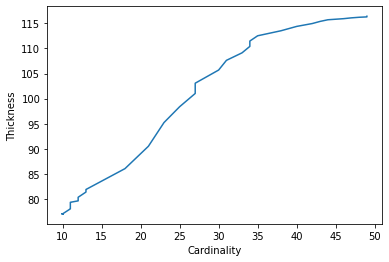

In [ ]:
eps = 1e-4


def solve(l=0):
    a = cp.Variable(n)
    b = cp.Variable()

    constraints = [
                    X.T@a - b >= 1,  # Dot Product of every vector in X - b >= 1
                    Y.T@a - b <= -1  # Dot Product of every vector in Y - b <= -1
    ]
    
    objective = cp.Minimize(cp.norm(a) + l*cp.norm(a, 1))
    prob = cp.Problem(objective, constraints)
    prob.solve()

    thickness = 2 / np.linalg.norm(a.value)
    card = np.sum(np.abs(a.value) > eps)
    return thickness, card, a.value

cards = []
thicknesses = []
a_list = []
log_space = np.logspace(-5, 5, 100)
for l in log_space:
    i, j, k = solve(l)
    cards.append(j)
    thicknesses.append(i)
    a_list.append(k)

plt.xlabel("Cardinality")
plt.ylabel("Thickness")
plt.plot(cards, thicknesses)
plt.show()

In [ ]:
a_list = np.array(a_list)
# a_list is of shape 100 * 50

# Defining a new Matrix A defined such that
# A[i][j] is True if in i-th value in log_space, j-th feature is significant
A = abs(a_list) > eps

# Prints the number of values in log_space such that j-th feature is significant
num_significant = np.sum(A, axis=0)
print("Number of Significant Occurances:\n", num_significant, end="\n\n")

# Just to illustrate that there are 10 features that are significant 
#     in every value in the log_space considered
print("Number of indices which are significant in every entry of logspace:", 
      np.sum(num_significant == 100))

X_old = X  # Saving X in another variable
Y_old = Y  # Saving Y in another variable

Number of Significant Occurances:
 [100  52  40  50  55  34 100 100  51  36  63  48  52  33  32  38  37 100
 100  43 100  41 100  52  46 100 100  51  35  44  44  51  45  50  49  35
  38  57   0  48  39  46  52  40  52 100  40  49  39  46]

Number of indices which are significant in every entry of logspace: 10


In [ ]:
# Arg Sort Sorts the indices in the ascending order
# Taking the Last 10 of the elements gives the index_array
index_array = np.argsort(num_significant)[-10:]
print("Index Array:", index_array)

thickness_old, _, _ = solve(0)

X = X_old[index_array]
Y = Y_old[index_array]

Index Array: [22  7  6 17 18 26 45 25 20  0]


In [ ]:
n = 10
thickness_new, _, _ = solve(0)

print("Before Feature Selection:", thickness_old)
print("After Feature Selection:", thickness_new)

Before Feature Selection: 116.42440501513754
After Feature Selection: 78.46967629766547
